# Mini Project : California Housing

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.datasets import fetch_california_housing

## Part I

### Load the Data:

In [237]:
data = fetch_california_housing()

df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['Target'] = data['target']

### Explore the Data:

In [208]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [238]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Preprocess the Data:

In [241]:
missing_data = df.isnull().sum()
print(missing_data)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


### Categorical Variables:

In [242]:
scaler = MinMaxScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

In [243]:
df['HouseAge_Category'] = pd.cut(df['HouseAge'], bins=[0, 10, 20, np.inf], labels=['New', 'Old', 'Very Old'])

In [250]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_columns = pd.DataFrame(encoder.fit_transform(df[['HouseAge_Category']]), columns=encoder.get_feature_names_out(['HouseAge_Category']))

In [251]:
df = pd.concat([df, encoded_columns], axis=1)

In [252]:
df = df.drop('HouseAge_Category', axis=1)

In [253]:
print(df_encoded.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.539668  0.784314  0.043512   0.020469    0.008941  0.001499  0.567481   
1  0.538027  0.392157  0.038224   0.018929    0.067210  0.001141  0.565356   
2  0.466028  1.000000  0.052756   0.021940    0.013818  0.001698  0.564293   
3  0.354699  1.000000  0.035241   0.021929    0.015555  0.001493  0.564293   
4  0.230776  1.000000  0.038534   0.022166    0.015752  0.001198  0.564293   

   Longitude  HouseAge_Category_nan  
0   0.211155                    0.0  
1   0.212151                    0.0  
2   0.210159                    0.0  
3   0.209163                    0.0  
4   0.209163                    0.0  


In [254]:
correlation_matrix = df_encoded.corr()

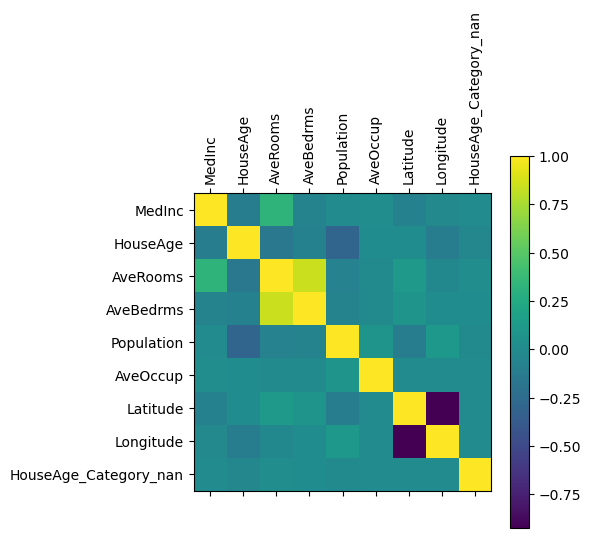

In [255]:
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()


In [256]:
df['New_Feature'] = df['MedInc'] + df['AveRooms']

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,HouseAge_Category_nan,New_Feature
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,4.526,0.0,0.583181
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,3.585,0.0,0.576251
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,3.521,0.0,0.518785
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,3.413,0.0,0.389940
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,3.422,0.0,0.269310
